In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 


In [314]:
drafts = pd.read_csv('data/all_data.csv')


In [342]:
drafts.columns
drafts["amateur_league"] = drafts["amateur_team"].apply(lambda val: str(val[val.find('(') + 1:-1]) if isinstance(val, str) else val)
drafts["career_duration"] = drafts["year_last"] - drafts["year"]
drafts.head()
# drafts.columns

,year,round,pick_overall,team_name,player,birth_country,pos,draft_age,year_last,amateur_team,...,pen_min,games_goalie,wins_goalie,losses_goalie,ties_goalie,save_pct,goals_against_avg,ps,amateur_league,career_duration
0,1990,1,1,Quebec Nordiques,Owen Nolan,GB,RW,18.0,2010.0,Cornwall (OHL),...,1793.0,NaN,NaN,NaN,NaN,NaN,NaN,91.6,OHL,20.0
1,1990,1,2,Vancouver Canucks,Petr Nedved,CZ,C,18.0,2007.0,Seattle (WHL),...,708.0,NaN,NaN,NaN,NaN,NaN,NaN,65.1,WHL,17.0
2,1990,1,3,Detroit Red Wings,Keith Primeau,CA,C,18.0,2006.0,Niagara Falls (OHL),...,1541.0,NaN,NaN,NaN,NaN,NaN,NaN,63.4,OHL,16.0
3,1990,1,4,Philadelphia Flyers,Mike Ricci,CA,C,18.0,2007.0,Peterborough (OHL),...,974.0,NaN,NaN,NaN,NaN,NaN,NaN,48.8,OHL,17.0
4,1990,1,5,Pittsburgh Penguins,Jaromir Jagr,CZ,RW,18.0,2018.0,Poldi Kladno (Czech),...,1167.0,NaN,NaN,NaN,NaN,NaN,NaN,217.1,Czech,28.0


In [269]:
# drafts_points = drafts[["year", "round", "pick_overall", "player", "team_name", "birth_country", "pos", "draft_age", "amateur_team", "amateur_league", "games_played","goals", "assists", "points"]]
# drafts_points

In [270]:
subset = drafts[["player","pos", "career_duration", "birth_country", "amateur_team", "amateur_league", "goals", "assists", "points"]]


In [271]:
teams = subset.groupby("amateur_team")
teams_sum = teams.sum().sort_values(by=["points"], ascending = False)
teams_mean = teams.mean().sort_values(by=["points"], ascending = False)
teams_max = teams.max().sort_values(by=["points"], ascending = False)

In [272]:
# subset.sort_values(by="career_duration", ascending=False)
# subset.groupby("birth_country")['career_duration'].describe()

countries = subset.groupby("birth_country")
# for country, group in countries:
#     print(group.count())
countries = countries.filter(lambda x: x['career_duration'].count() > 30)
countries = countries.groupby("birth_country")
avg_scoring = countries['goals', 'assists', 'points'].mean()
count = countries['player', 'career_duration'].count()

In [273]:
count["proportion_made"] = count["career_duration"] / count['player']
count["drafted_no_career"] = count["player"] - count["career_duration"]
combined = avg_scoring.merge(count, left_index=True, right_index=True)
combined.sort_values(by='player', ascending=False, inplace=True)
combined

,goals,assists,points,player,career_duration,proportion_made,drafted_no_career
birth_country,,,,,,,
CA,40.082105,65.663158,105.745263,3227,1425,0.441587,1802
US,36.180272,61.061224,97.241497,1595,588,0.368652,1007
RU,49.404145,81.471503,130.875648,609,193,0.316913,416
SE,43.286364,82.854545,126.140909,573,220,0.383944,353
CZ,50.271739,92.652174,142.923913,387,184,0.475452,203
FI,28.953020,53.959732,82.912752,370,149,0.402703,221
SK,56.042254,84.535211,140.577465,144,71,0.493056,73


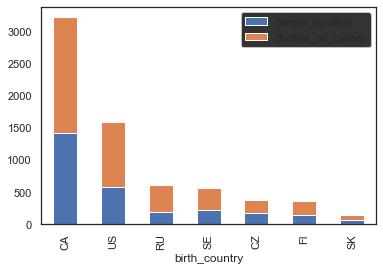

In [274]:
combined[['career_duration', 'drafted_no_career']].plot(kind="bar", stacked=True)
# combined['proportion_made'].plot(kind="bar", secondary_y=True, color="red", alpha = 0.3)

done


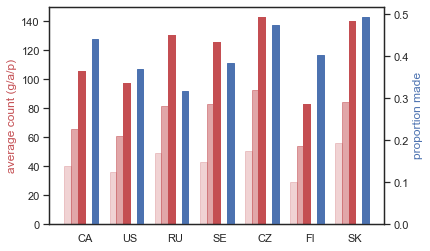

In [275]:
# Putting together the plots
num_bars = len(combined.index)
bar_width = 0.15
x = np.arange(num_bars)

left_y = ["goals", "assists", "points", "points"]
right_y = ["proportion_made"]

total_width = bar_width * (len(left_y) + len(right_y))

fig, ax1 = plt.subplots()
ax1.set_ylabel('average count (g/a/p)', color='r')

left_rects = [ax1.bar(x - (total_width / 2) + bar_width * left_y.index(val), 
                     combined[val], bar_width, label=val) for val in left_y]

ax2 = ax1.twinx()
ax2.set_ylabel('proportion made', color='b')

right_rects = [ax2.bar(x - (total_width / 2) + (bar_width * (right_y.index(val) + len(left_y))), 
                     combined[val], bar_width, label=val) for val in right_y]

for rects in left_rects:
    for rect in rects:
        rect.set_color('r')
        rect.set_alpha((1 + left_rects.index(rects)) / len(left_rects))
        
for rects in right_rects:
    for rect in rects:
        rect.set_color('b')
        rect.set_alpha((1 + right_rects.index(rects)) / len(right_rects))

ax1.set_xticks(x)
ax1.set_xticklabels(combined.index)

print('done')

In [276]:
combined.reset_index(inplace=True)

In [277]:
s_countries = subset.groupby("birth_country").filter(lambda x: x['career_duration'].count() > 30)
s_countries = s_countries[s_countries['career_duration'] > 0]

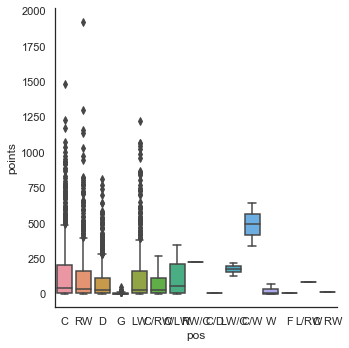

In [280]:
sns.catplot(x="pos", y="points", data=s_countries, kind="box")

In [286]:
s_countries['pos'].unique()

array(['C', 'RW', 'D', 'G', 'LW', 'C/RW', 'C/LW', 'RW/C', 'C/D', 'LW/C',
       'C/W', 'W', 'F', 'L/RW', 'C RW'], dtype=object)

In [288]:
positions = ['C', 'RW', 'D', 'G', 'LW', 'C/RW', 'C/LW', 'RW/C', 'C/D', 'LW/C', 'C/W', 'W', 'F', 'L/RW', 'C RW']
position_map = {
    'C': 'C',
    'RW': 'W',
    'D': 'D',
    'G': 'G',
    'LW': 'W',
    'C/RW': 'C/W',
    'C/LW': 'C/W',
    'RW/C': 'C/W',
    'C/D': 'C/D',
    'LW/C': 'C/W',
    'C/W': 'C/W',
    'W': 'W',
    'F': 'C/W',
    'L/RW': 'W',
    'C RW': 'C/W'
}

s_countries['pos'] = s_countries['pos'].apply(lambda x: position_map[x])

In [312]:
# #To select rows whose column value is in list 
# years = [1952, 2007]
# gapminder.year.isin(years)
# We can use the boolean array to select the rows like before

# 1
# 2
# 3
# >gapminder_years= gapminder[gapminder.year.isin(years)]
# >gapminder_years.shape
# (284, 6)
scoring_positions = ['C', 'W', 'D']
s_countries = s_countries[s_countries.pos.isin(scoring_positions)]

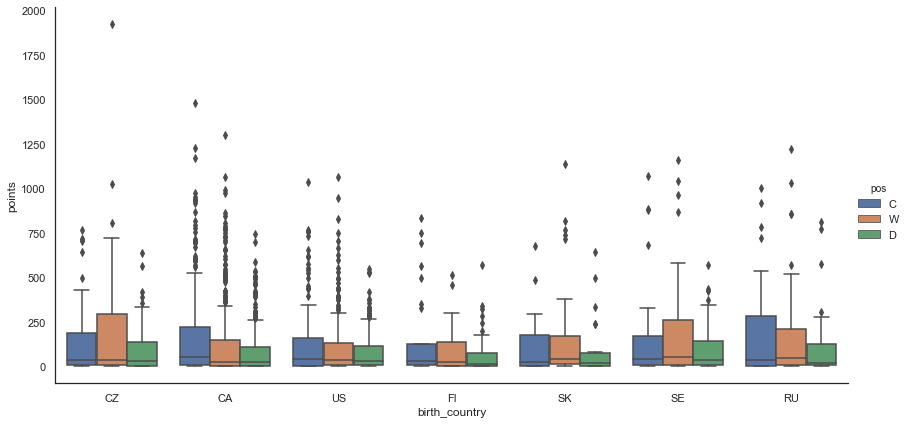

In [313]:
# plt.figure(figsize=(6, 10))
sns.catplot(kind="box", x="birth_country", y="points", hue="pos", data=s_countries, height=6, aspect=2)

In [328]:
first_picks = drafts[drafts.pick_overall == 1]
first_picks.groupby('team_name').count()['year'].sort_values(ascending=False)

team_name
Edmonton Oilers          4
Ottawa Senators          3
Tampa Bay Lightning      3
New Jersey Devils        2
Florida Panthers         2
New York Islanders       2
Atlanta Thrashers        2
Pittsburgh Penguins      2
Quebec Nordiques         2
Toronto Maple Leafs      1
St. Louis Blues          1
Columbus Blue Jackets    1
Colorado Avalanche       1
Chicago Blackhawks       1
Buffalo Sabres           1
Boston Bruins            1
Washington Capitals      1
Name: year, dtype: int64

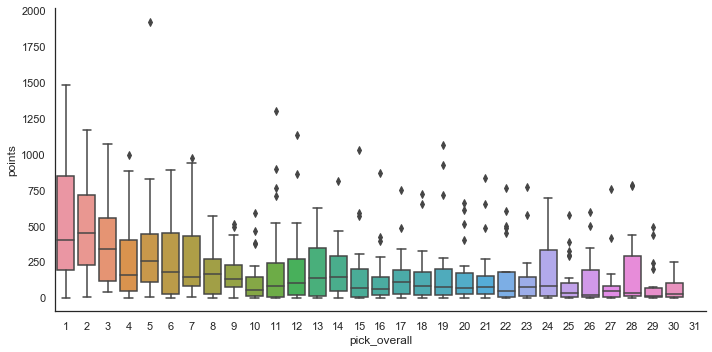

In [349]:
first_round = drafts[drafts['round'] == 1]
sns.catplot(x='pick_overall', y='points', data=first_round, kind="box", height = 5, aspect = 2)

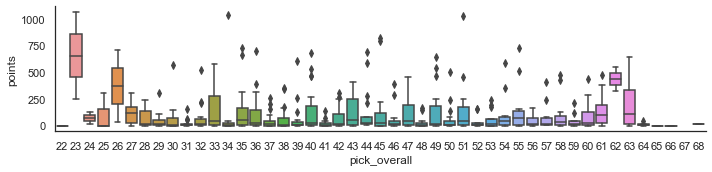

In [350]:
second_round = drafts[drafts['round'] == 2]
sns.catplot(x='pick_overall', y='points', data=second_round, kind="box", height = 2.5, aspect = 4)

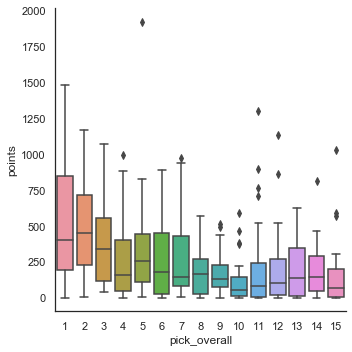

In [371]:
first_round = drafts[drafts.pick_overall <= 15]
sns.catplot(x='pick_overall', y='points', data=first_round, kind="box", height = 5, aspect = 1)

In [373]:
drafts[drafts.pick_overall == 10][['year', 'round', 'pick_overall', 'team_name', 'player', 'career_duration', 'goals', 'assists', 'points']]

,year,round,pick_overall,team_name,player,career_duration,goals,assists,points
9,1990,1,10,Toronto Maple Leafs,Drake Berehowsky,14.0,37.0,112.0,149.0
261,1991,1,10,Detroit Red Wings,Martin Lapointe,17.0,181.0,200.0,381.0
525,1992,1,10,San Jose Sharks,Andrei Nazarov,14.0,53.0,71.0,124.0
789,1993,1,10,Quebec Nordiques,Jocelyn Thibault,15.0,0.0,6.0,6.0
1075,1994,1,10,Washington Capitals,Nolan Baumgartner,16.0,7.0,40.0,47.0
1361,1995,1,10,Florida Panthers,Radek Dvorak,19.0,227.0,363.0,590.0
1595,1996,1,10,New Jersey Devils,Lance Ward,8.0,4.0,12.0,16.0
1836,1997,1,10,Vancouver Canucks,Brad Ference,10.0,4.0,30.0,34.0
2082,1998,1,10,Toronto Maple Leafs,Nik Antropov,15.0,193.0,272.0,465.0
2340,1999,1,10,New York Islanders,Branislav Mezei,9.0,5.0,19.0,24.0


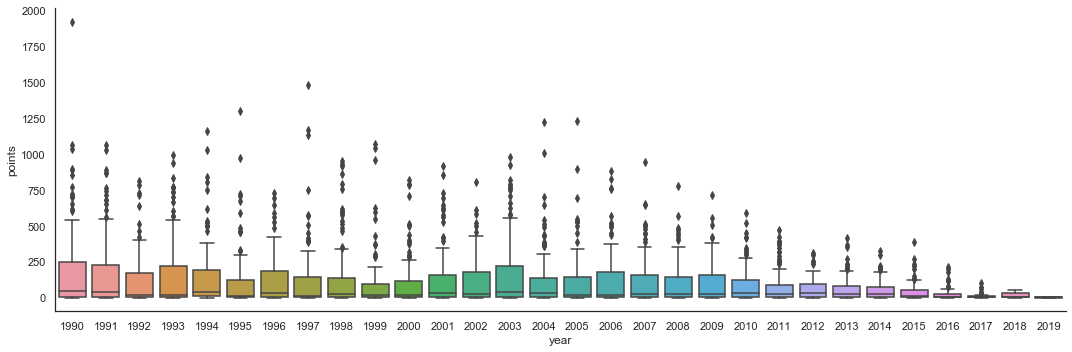

In [358]:
sns.catplot(x='year', y='points', data=drafts, kind='box', height=5, aspect = 3)